
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        28
           1       0.70      0.70      0.70        33

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   ma

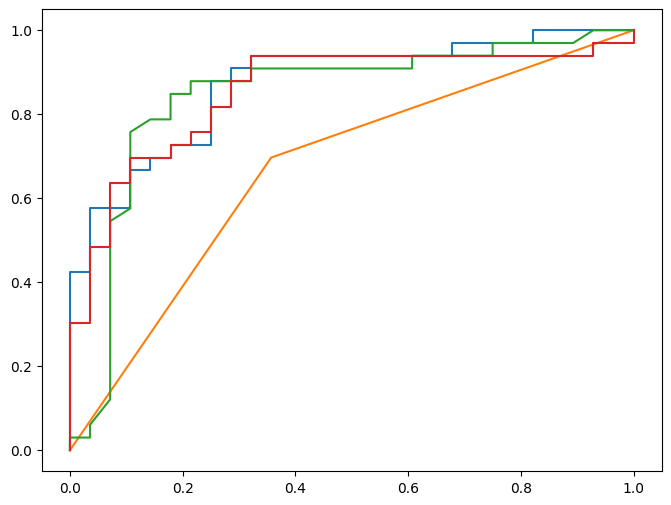

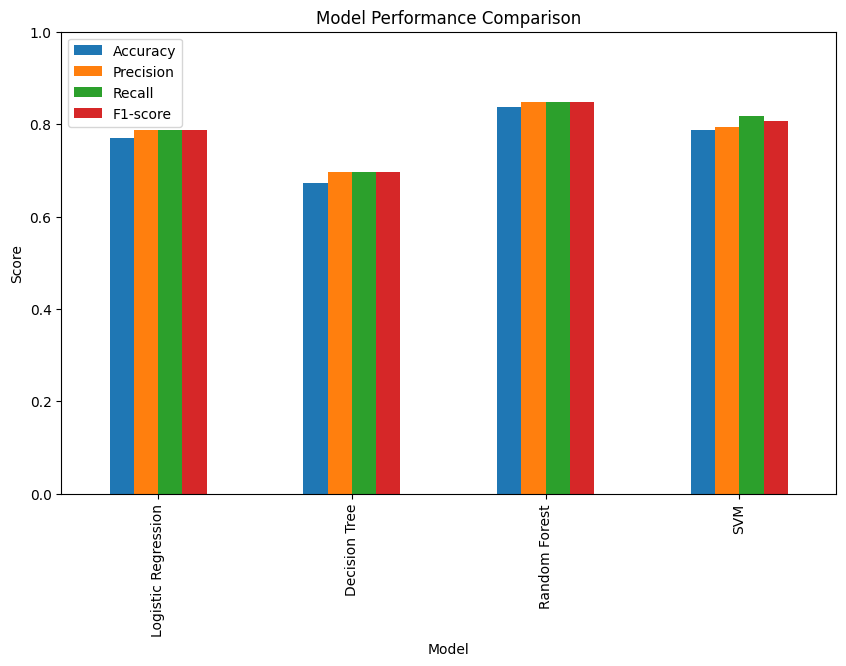

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


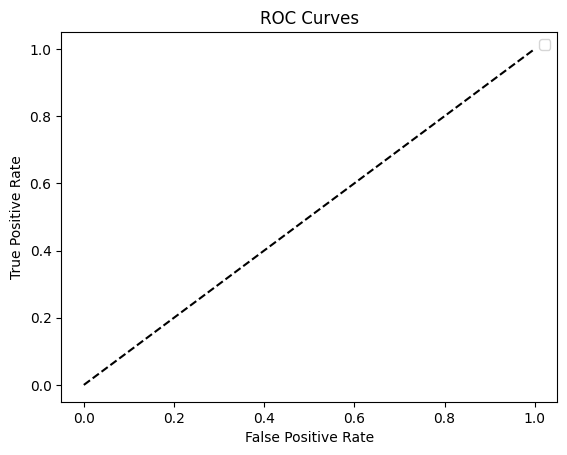

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv("../data/heart_disease_selected.csv")

X = df.drop("target", axis=1)
y = df["target"]

# --------------------------
# Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# Models
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# --------------------------
# Train & Evaluate
# --------------------------
metrics_list = []
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    metrics_list.append([name, acc, prec, rec, f1, auc])
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])
print("\n📊 Model Performance Comparison:\n")
print(metrics_df.round(3))

# --------------------------
# Visualization
# --------------------------
metrics_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(10,6), ylim=(0,1)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
